# 1.Problem statement


This project understands how the waiter's tip is affect by other variables such as total bill, sex, smoker, day, time and size.

# 2. Data Collection
Data source : https://www.kaggle.com/datasets/desalegngeb/students-exam-scores

## 2.1 Import Data and Packages

In [4]:
#import numpy, pandas, matplotlib, seaborn and warnings library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
#read dataset as a pandas dataframe
df = pd.read_csv('../Data/tips.csv')

In [6]:
#show top 5 rows of the dataset
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# shape of the dataset
df.shape

(244, 7)

This dataset consist 244 rows and 7 columns.

## 2.2 Dataset informations.

In [8]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

# 3. Checking the dataset.

## 3.1 Checking the data types

In [9]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [10]:
all_col = list(df.columns)
num_col = list(df._get_numeric_data())
cat_col = list(set(all_col) - set(num_col))

print("All features : ")
print(all_col)
print("\n Numerical features : ")
print(num_col)
print("\n Catogarical features : ")
print(cat_col)

All features : 
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

 Numerical features : 
['total_bill', 'tip', 'size']

 Catogarical features : 
['day', 'sex', 'time', 'smoker']


## 3.2 Checking duplicate values.

In [11]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace = True)

## 3.3 Checking the missing values.

In [13]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

There are no mising values in that dataset.

## 3.4 Checking the unique values at each column.

In [14]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [20]:
for i in all_col:
    print("Column name = ", i)
    print("Data type of the column = ", df[i].dtype)
    print(df[i].unique())
    print("\n")

Column name =  total_bill
Data type of the column =  float64
[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 13.81 11.02 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07 26.86 25.28
 14.73 10.51 27.2  22.76 17.29 19.44 16.66 10.07 32.68 15.98 34.83 13.03
 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17 27.28 12.03 12.46
 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21 18.24 14.31 14.    7.25
 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08 11.69 13.42 14.26 15.95
 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27 11.17 12.26 18.26  8.51
 14.15 16.   13.16 17.47 34.3  41.19 27.05 16.43  8.35 18.64 11.87  9.78
  7.51 14.07 13.13 17.26 24.55 19.77 29.85 48.17 25.   13.39 16.

## 3.5 Check the statics of the dataset

In [18]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


# 4. Exploring data

<Figure size 2500x2500 with 0 Axes>

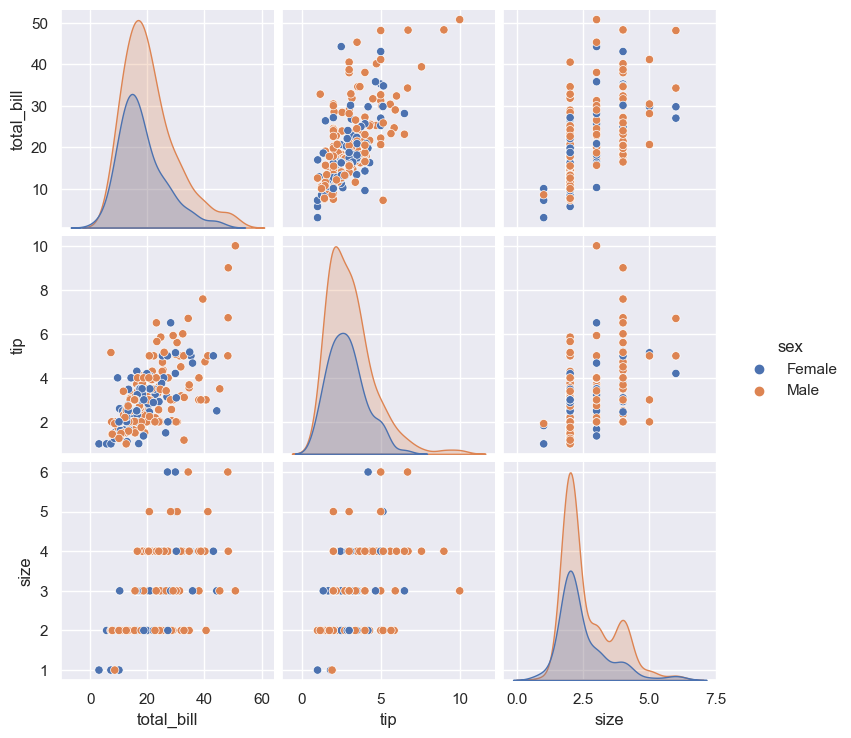

In [22]:
sns.set()
plt.figure(figsize = (25, 25))
sns.pairplot(data = df, hue = 'sex')
plt.show()

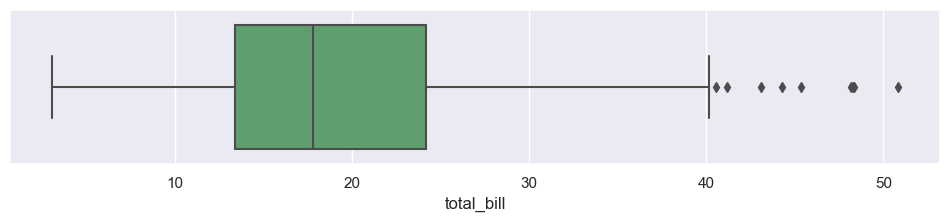

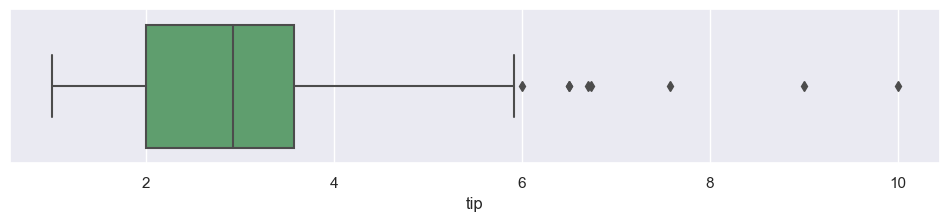

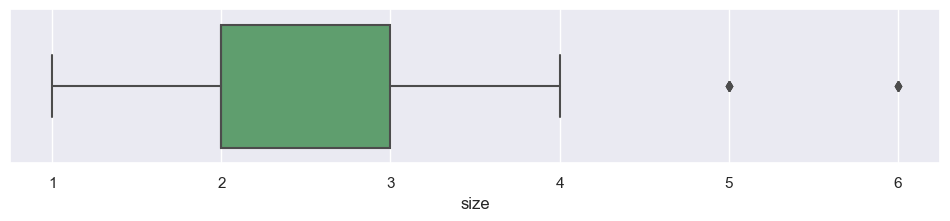

In [24]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i, color = 'g')
    plt.show()

In [25]:
for i in num_col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    upper = q3 + (1.5 * IQR)
    df.loc[df[i] < lower, i] = lower
    df.loc[df[i] > upper, i] = upper

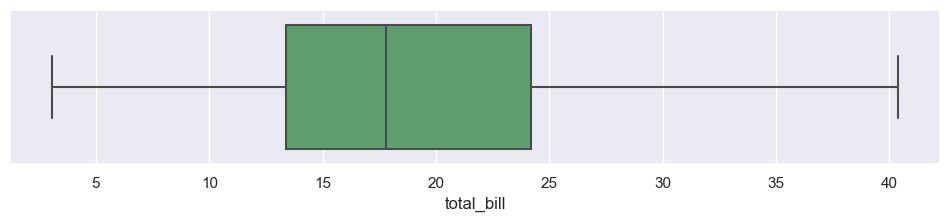

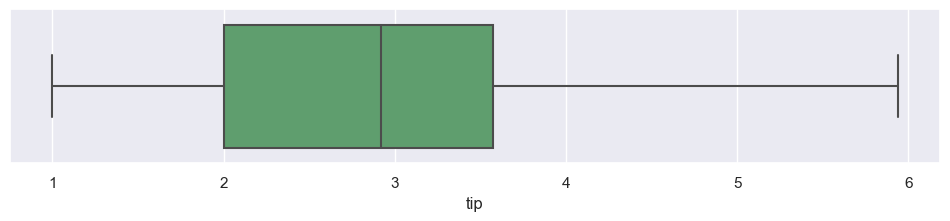

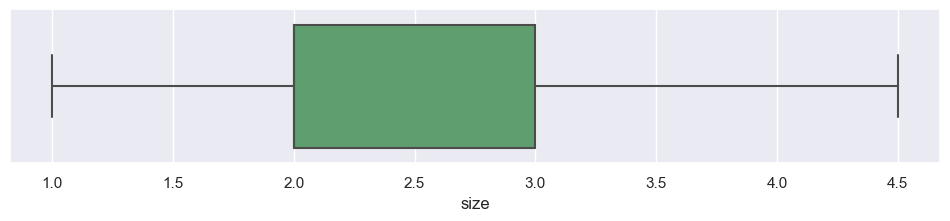

In [26]:
for i in num_col:
    sns.set()
    plt.figure(figsize = (12, 2))
    sns.boxplot(data = df, x = i, color = 'g')
    plt.show()

Sat     35.802469
Sun     31.275720
Thur    25.102881
Fri      7.818930
Name: day, dtype: float64


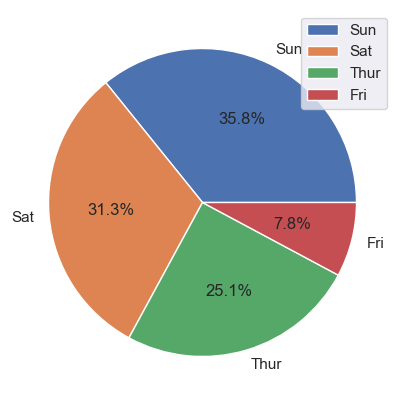

Male      64.609053
Female    35.390947
Name: sex, dtype: float64


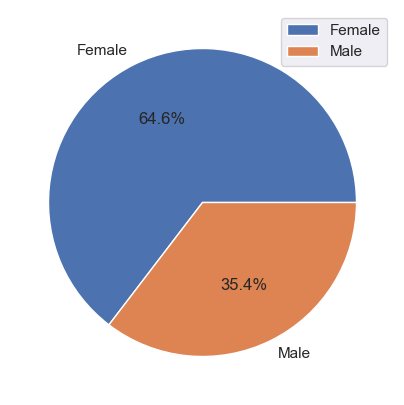

Dinner    72.427984
Lunch     27.572016
Name: time, dtype: float64


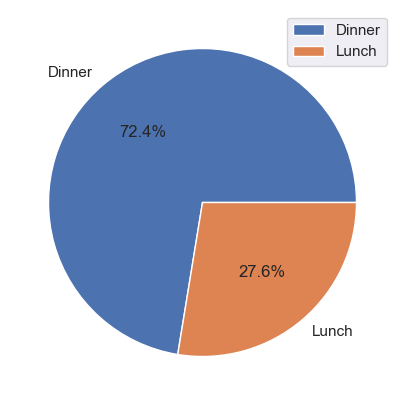

No     62.139918
Yes    37.860082
Name: smoker, dtype: float64


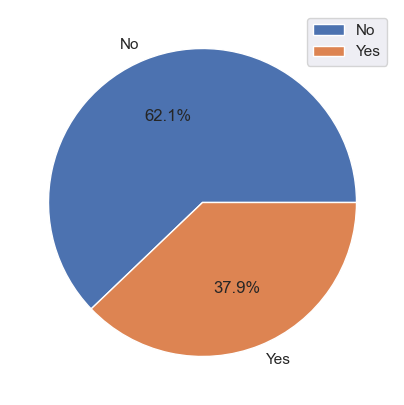

In [30]:
for i in cat_col:
    x = df[i].value_counts(normalize = True)
    label = df[i].unique()
    print(x * 100)
    
    sns.set()
    plt.figure(figsize = (5, 5))
    plt.pie(x = x, labels = label, autopct = '%1.1f%%')
    plt.legend()
    plt.show()

In [32]:
df.to_csv('../Data/Cleaned.csv')